In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Part IV: Preprocessing

The main focus of this book is on statistical models for computer vision; the previous chapters concern models that relate visual measurements $ x $ to the world $ w $. However, there has been little discussion of how the measurement vector $ x $ was created, and it has often been implied that it contains concatenated RGB pixel values. In state-of-the-art vision systems, the image pixel data are almost always preprocessed to form the measurement vector. We define preprocessing to be any transformation of the pixel data prior to building the model that relates the data to the world. Such transformations are often ad-hoc heuristics: their parameters are not learned from training data, but they are chosen based on experience of what works well.

The philosophy behind image preprocessing is easy to understand; the image data may be contingent on many aspects of the real world that do not pertain to the task at hand. For example, in an object detection task, the RGB values will change depending on the camera gain, illumination, object pose, and particular instance of the object. The goal of image preprocessing is to remove as much of this unwanted variation as possible, while retaining the aspects of the image that are critical to the final decision. In a sense, the need for preprocessing represents a failure; we are admitting that we cannot directly model the relationship between the RGB values and the world state. Inevitably, we must pay a price for this. Although the variation due to extraneous factors is jettisoned, it is very probable that some of the task-related information is also discarded. Fortunately, in these nascent years of computer vision, this rarely seems to be the limiting factor that governs the overall performance.

We devote the single chapter in this section to discussing a variety of preprocessing techniques. Although the treatment here is not extensive, it should be emphasized that preprocessing is very important; in practice, the choice of preprocessing technique can influence the performance of vision systems at least as much as the choice of model.

## Key Concepts

- **Visual Measurements**: Represented as $ x $, typically derived from image pixel data.
- **World State**: Denoted as $ w $, the external reality that the vision system aims to interpret.
- **Preprocessing Definition**: Any transformation of pixel data before modeling $ x $ to $ w $.

## Mathematical Representation

Consider an image with RGB pixel values forming a raw data vector:

$$
x_{\text{raw}} = [R_1, G_1, B_1, R_2, G_2, B_2, \dots, R_n, G_n, B_n]
$$

Preprocessing transforms this into a new measurement vector:

$$
x = f(x_{\text{raw}})
$$

where $ f $ is a function (often heuristic) designed to reduce unwanted variation while preserving task-relevant information.

## Discussion

The trade-off in preprocessing can be expressed as:

$$
\text{Information Retained} = \text{Task-Relevant Info} - \text{Lost Relevant Info}
$$

where the goal is to maximize task-relevant information while minimizing the loss of critical data. This balance remains an empirical challenge in computer vision.



# Image Preprocessing Implementation for Computer Vision

This notebook implements common preprocessing techniques for RGB image data, as discussed in *Part IV: Preprocessing*. The goal is to transform raw pixel data $ x_{\text{raw}} $ into a measurement vector $ x $ suitable for statistical modeling in computer vision tasks like object detection.

## Setup

First, install and import the necessary libraries:

```python
!pip install opencv-python numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
```

## Load and Display Sample Image

We’ll use a sample RGB image to demonstrate preprocessing.

```python
# Load an example image (replace 'sample.jpg' with a real image path)
image = cv2.imread('sample.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()

# Raw pixel data as a vector
x_raw = image.reshape(-1, 3)  # Flatten to [pixels, RGB]
print(f"Raw measurement vector shape: {x_raw.shape}")
```

## Preprocessing Techniques

### 1. Normalization
Normalizes RGB values to a range [0, 1] to reduce variation due to camera gain or illumination.

**Mathematical Form**:
$$
x_{\text{norm}} = \frac{x_{\text{raw}} - \min(x_{\text{raw}})}{\max(x_{\text{raw}}) - \min(x_{\text{raw}})}
$$

```python
# Normalize the image
x_norm = image.astype(float) / 255.0

# Display normalized image
plt.figure(figsize=(5, 5))
plt.imshow(x_norm)
plt.title("Normalized Image")
plt.axis('off')
plt.show()
```

### 2. Grayscale Conversion
Converts RGB to grayscale to remove color variation irrelevant to edge-based tasks.

**Mathematical Form**:
$$
x_{\text{gray}} = 0.299R + 0.587G + 0.114B
$$

```python
# Convert to grayscale
x_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(x_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()
```

### 3. Histogram Equalization
Enhances contrast to mitigate illumination effects.

```python
# Apply histogram equalization (on grayscale image)
x_equalized = cv2.equalizeHist(x_gray)

# Display equalized image
plt.figure(figsize=(5, 5))
plt.imshow(x_equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()
```

### 4. Gaussian Blur
Reduces noise while preserving structural information.

**Mathematical Form**:
$$
x_{\text{blur}} = x_{\text{gray}} * G(\sigma)
$$
where $ G(\sigma) $ is a Gaussian kernel with standard deviation $ \sigma $.

```python
# Apply Gaussian blur
x_blur = cv2.GaussianBlur(x_gray, (5, 5), sigmaX=1.0)

# Display blurred image
plt.figure(figsize=(5, 5))
plt.imshow(x_blur, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()
```

### 5. Edge Detection (Sobel Filter)
Extracts edges to focus on task-relevant structural features.

**Mathematical Form**:
$$
x_{\text{edge}} = \sqrt{\left(\frac{\partial x_{\text{gray}}}{\partial x}\right)^2 + \left(\frac{\partial x_{\text{gray}}}{\partial y}\right)^2}
$$

```python
# Compute Sobel edges
sobel_x = cv2.Sobel(x_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(x_gray, cv2.CV_64F, 0, 1, ksize=3)
x_edge = np.sqrt(sobel_x**2 + sobel_y**2)
x_edge = np.uint8(np.clip(x_edge, 0, 255))  # Convert to 8-bit image

# Display edge image
plt.figure(figsize=(5, 5))
plt.imshow(x_edge, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()
```

## Final Measurement Vector

Combine preprocessing steps into a pipeline (e.g., grayscale + blur + edges) and flatten into a vector \( x \).

```python
# Preprocessing pipeline
x_processed = cv2.GaussianBlur(x_gray, (5, 5), sigmaX=1.0)  # Blur
x_processed = cv2.Sobel(x_processed, cv2.CV_64F, 1, 0, ksize=3)  # Edge detection (x-direction only for simplicity)
x_processed = np.uint8(np.clip(x_processed, 0, 255))  # Clip to 8-bit
x = x_processed.flatten()  # Final measurement vector

print(f"Processed measurement vector shape: {x.shape}")
```

## Discussion

- **Normalization**: Reduces illumination and gain effects but retains all pixel data.
- **Grayscale**: Discards color, focusing on intensity, which may lose some object-specific info.
- **Histogram Equalization**: Improves contrast but may amplify noise.
- **Gaussian Blur**: Removes noise but risks smoothing task-relevant details.
- **Edge Detection**: Highlights structure, discarding texture info irrelevant to some tasks.

The choice of preprocessing depends on the task (e.g., object detection prioritizes edges). As noted in the book, we lose some information but aim to keep what’s critical.

```



In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('sample.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title("Original RGB Image")
plt.axis('off')
plt.show()
x_raw = image.reshape(-1, 3)
print(f"Raw measurement vector shape: {x_raw.shape}")

x_norm = image.astype(float) / 255.0
plt.figure(figsize=(5, 5))
plt.imshow(x_norm)
plt.title("Normalized Image")
plt.axis('off')
plt.show()

x_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(5, 5))
plt.imshow(x_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

x_equalized = cv2.equalizeHist(x_gray)
plt.figure(figsize=(5, 5))
plt.imshow(x_equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

x_blur = cv2.GaussianBlur(x_gray, (5, 5), sigmaX=1.0)
plt.figure(figsize=(5, 5))
plt.imshow(x_blur, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')
plt.show()

sobel_x = cv2.Sobel(x_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(x_gray, cv2.CV_64F, 0, 1, ksize=3)
x_edge = np.sqrt(sobel_x**2 + sobel_y**2)
x_edge = np.uint8(np.clip(x_edge, 0, 255))
plt.figure(figsize=(5, 5))
plt.imshow(x_edge, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()

x_processed = cv2.GaussianBlur(x_gray, (5, 5), sigmaX=1.0)
x_processed = cv2.Sobel(x_processed, cv2.CV_64F, 1, 0, ksize=3)
x_processed = np.uint8(np.clip(x_processed, 0, 255))
x = x_processed.flatten()
print(f"Processed measurement vector shape: {x.shape}")

# Image Preprocessing and Feature Extraction

This chapter provides a brief overview of modern preprocessing methods for computer vision. In section 13.1, we introduce methods in which we replace each pixel in the image with a new value. Section 13.2 considers the problem of finding and characterizing edges, corners, and interest points in images. In section 13.3, we discuss visual descriptors; these are low-dimensional vectors that attempt to characterize the interesting aspects of an image region in a compact way. Finally, in section 13.4, we discuss methods for dimensionality reduction.

## Per-Pixel Transformations

We start our discussion of preprocessing with per-pixel operations: these methods return a single value corresponding to each pixel of the input image. We denote the original 2D array of pixel data as \( P \), where \( p_{ij} \) is the element at the \( i \)-th of \( I \) rows and the \( j \)-th of \( J \) columns. The element \( p_{ij} \) is a scalar representing the grayscale intensity. Per-pixel operations return a new 2D array \( X \) of the same size as \( P \), containing elements \( x_{ij} \).

### Whitening

The goal of whitening (figure 13.1) is to provide invariance to fluctuations in the mean intensity level and contrast of the image. Such variation may arise because of a change in ambient lighting intensity, the object reflectance, or the camera gain. To compensate for these factors, the image is transformed so that the resulting pixel values have zero mean and unit variance. To this end, we compute the mean \( \mu \) and variance \( \sigma^2 \) of the original grayscale image \( P \):

$$
\mu = \frac{1}{IJ} \sum_{i=1}^{I} \sum_{j=1}^{J} p_{ij}
$$

$$
\sigma^2 = \frac{1}{IJ} \sum_{i=1}^{I} \sum_{j=1}^{J} (p_{ij} - \mu)^2
$$

These statistics are used to transform each pixel value separately so that:

$$
x_{ij} = \frac{p_{ij} - \mu}{\sigma}
$$

For color images, this operation may be carried out by computing the statistics $ \mu $ and $ \sigma^2 $ from all three channels or by separately transforming each of the RGB channels based on their own statistics. Note that even this simple transform has the potential to hamper subsequent inference about the scene: depending on the task, the absolute intensities may or may not contain critical information. Even the simplest preprocessing methods must be applied with care.

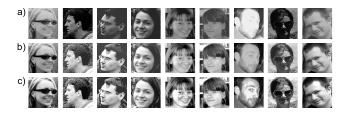

Whitening and histogram equalization. a) A number of faces which have been captured with widely varying contrasts and mean levels b) After whitening the images have the same mean and variance. c) After histogram equalization the distribution of gray values is approximately uni- form. Both of these transformations reduce the amount of variation due to contrast and intensity changes.

**Fig.1**: Whitening and histogram equalization.  
a) A number of faces which have been captured with widely varying contrasts and mean levels.  
b) After whitening, the images have the same mean and variance.  
c) After histogram equalization, the distribution of gray values is approximately uniform. Both of these transformations reduce the amount of variation due to contrast and intensity changes.

### Histogram Equalization

The goal of histogram equalization (figure 13.1c) is to modify the statistics of the intensity values so that all of their moments take predefined values. To this end, a nonlinear transformation is applied that forces the distribution of pixel intensities to be flat. We first compute the histogram of the original intensities $ h $, where the $ k $-th of $ K $ entries is given by:

$$
h_k = \sum_{i=1}^{I} \sum_{j=1}^{J} \delta[p_{ij} - k]
$$

where the operation $ \delta[\cdot] $ returns one if the argument is zero and zero otherwise. We then cumulatively sum this histogram and normalize by the total number of pixels to compute the cumulative proportion $c $ of pixels that are less than or equal to each intensity level:

$$
c_k = \frac{\sum_{l=1}^{k} h_l}{IJ}
$$

Finally, we use the cumulative histogram as a look-up table to compute the transformed value so that:

$$
x_{ij} = K c_{p_{ij}}
$$

For example, in figure 13.2, the value 90 will be mapped to $ K \times 0.29 $, where $ K $ is the maximum intensity (usually 255). The result is a continuous number rather than a discretized pixel intensity, but it is in the same range as the original data. The result can be rounded to the nearest integer if subsequent processing demands.

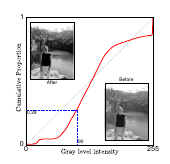

The abscissa indicates the pixel intensity. The ordinate indicates the proportion of intensities that were less than or equal to this value. This plot can be used as a look up table for histogram equalizing the intensities. For a given intensity value on the abscissa, we choose the new intensity to be the maximum output intensity K times the value on the ordinate. After this transformation, the intensities are equally distributed. In the example image, many of the pixels are bright. Histogram equalization spreads these bright values out over a larger intensity range, and so has the eﬀect of increasing the contrast in the brighter regions.

**Fig.2**: Histogram equalization.  
The abscissa indicates the pixel intensity. The ordinate indicates the proportion of intensities that were less than or equal to this value. This plot can be used as a look-up table for histogram equalizing the intensities. For a given intensity value on the abscissa, we choose the new intensity to be the maximum output intensity $ K $ times the value on the ordinate. After this transformation, the intensities are equally distributed. In the example image, many of the pixels are bright. Histogram equalization spreads these bright values out over a larger intensity range, and so has the effect of increasing the contrast in the brighter regions.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

# Whitening
mu = np.mean(image)
sigma = np.std(image)
x_whitened = (image - mu) / sigma
x_whitened = np.uint8(np.clip((x_whitened * 128 + 128), 0, 255))  # Rescale to [0, 255]
plt.imshow(x_whitened, cmap='gray')
plt.title("Whitened Image")
plt.axis('off')
plt.show()

# Histogram Equalization
h, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
c = h.cumsum() / (image.shape[0] * image.shape[1])
x_equalized = np.interp(image.flatten(), bins[:-1], 255 * c).reshape(image.shape)
x_equalized = np.uint8(x_equalized)
plt.imshow(x_equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

# Display histograms for comparison
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(image.flatten(), bins=256, range=[0, 256], color='gray')
plt.title("Original Histogram")
plt.subplot(132)
plt.hist(x_whitened.flatten(), bins=256, range=[0, 256], color='gray')
plt.title("Whitened Histogram")
plt.subplot(133)
plt.hist(x_equalized.flatten(), bins=256, range=[0, 256], color='gray')
plt.title("Equalized Histogram")
plt.tight_layout()
plt.show()

In [ ]:
# Histogram Equalization and Linear Filtering

## Histogram Equalization

The goal of histogram equalization (figure 13.1c) is to modify the statistics of the intensity values so that all of their moments take predefined values. To this end, a nonlinear transformation is applied that forces the distribution of pixel intensities to be flat. We first compute the histogram of the original intensities \( h \), where the \( k \)-th of \( K \) entries is given by:

$$
h_k = \sum_{i=1}^{I} \sum_{j=1}^{J} \delta[p_{ij} - k]
$$

where the operation $ \delta[\cdot] $ returns one if the argument is zero and zero otherwise. We then cumulatively sum this histogram and normalize by the total number of pixels to compute the cumulative proportion \( c \) of pixels that are less than or equal to each intensity level:

$$
c_k = \frac{\sum_{l=1}^{k} h_l}{IJ}
$$

Finally, we use the cumulative histogram as a look-up table to compute the transformed value so that:

$$
x_{ij} = K c_{p_{ij}}
$$

For example, in Fig.2, the value 90 will be mapped to $ K \times 0.29 $, where $ K $ is the maximum intensity (usually 255). The result is a continuous number rather than a discretized pixel intensity, but it is in the same range as the original data. The result can be rounded to the nearest integer if subsequent processing demands.


    
**Fig.2**: Histogram equalization.  
The abscissa indicates the pixel intensity. The ordinate indicates the proportion of intensities that were less than or equal to this value. This plot can be used as a look-up table for histogram equalizing the intensities. For a given intensity value on the abscissa, we choose the new intensity to be the maximum output intensity \( K \) times the value on the ordinate. After this transformation, the intensities are equally distributed. In the example image, many of the pixels are bright. Histogram equalization spreads these bright values out over a larger intensity range, and so has the effect of increasing the contrast in the brighter regions.

## Linear Filtering

After filtering an image, the new pixel value $ x_{ij} $ consists of a weighted sum of the intensities of pixels in the surrounding area of the original image \( P \). The weights are stored in a filter kernel \( F \), which has entries \( f_{m,n} \), where \( m \in \{-M \dots M\} \) and \( n \in \{-N \dots N\} \). More formally, when we apply a filter, we convolve \( P \) with the filter \( F \), where two-dimensional convolution is defined as:

$$
x_{ij} = \sum_{m=-M}^{M} \sum_{n=-N}^{N} p_{i-m,j-n} f_{m,n}
$$

Notice that by convention, the filter is flipped in both directions so the top left of the filter $ f_{-M,-N} $ weights the pixel $ p_{i+M,j+N} $ to the right and below the current point in \( P \). Many filters used in vision are symmetric in such a way that this flipping makes no practical difference. Without further modification, this formulation will run into problems near the borders of the image: it needs to access points that are outside the image. One way to deal with this is to use zero padding in which it is assumed that the value of \( P \) is 0 outside the defined image region.

**Fig.3**: Image blurring.  
a) Original image.  
b) Result of convolving with a Gaussian filter (filter shown in bottom right of image). Each pixel in this image is a weighted sum of the surrounding pixels in the original image, where the weights are given by the filter. The result is that the image is slightly blurred.  
c-e) Convolving with a filter of increasing standard deviation causes the resulting image to be increasingly blurred.

### Gaussian (Blurring) Filter

To blur an image, we convolve it with a 2D Gaussian:

$$
f(m, n) = \frac{1}{2\pi \sigma^2} \exp \left( -\frac{m^2 + n^2}{2\sigma^2} \right)
$$

Each pixel in the resulting image is a weighted sum of the surrounding pixels, where the weights depend on the Gaussian profile: nearer pixels contribute relatively more to the final output. This process blurs the image, where the degree of blurring is dependent on the standard deviation \( \sigma \) of the Gaussian filter (figure 13.3). This is a simple method to reduce noise in images taken at very low light levels.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Histogram Equalization
h, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
c = h.cumsum() / (image.shape[0] * image.shape[1])
x_equalized = np.interp(image.flatten(), bins[:-1], 255 * c).reshape(image.shape)
x_equalized = np.uint8(x_equalized)
plt.imshow(x_equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

# Gaussian Blurring (Linear Filtering)
sigma = 1.0
size = 5  # 5x5 kernel
m, n = np.meshgrid(np.arange(-size//2 + 1, size//2 + 1), np.arange(-size//2 + 1, size//2 + 1))
f = (1 / (2 * np.pi * sigma**2)) * np.exp(-(m**2 + n**2) / (2 * sigma**2))
f /= f.sum()  # Normalize kernel
x_blurred = cv2.filter2D(image, -1, f)
plt.imshow(x_blurred, cmap='gray')
plt.title("Gaussian Blurred Image (σ=1.0)")
plt.axis('off')
plt.show()

# Display histograms for comparison
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(image.flatten(), bins=256, range=[0, 256], color='gray')
plt.title("Original Histogram")
plt.subplot(132)
plt.hist(x_equalized.flatten(), bins=256, range=[0, 256], color='gray')
plt.title("Equalized Histogram")
plt.subplot(133)
plt.hist(x_blurred.flatten(), bins=256, range=[0, 256], color='gray')
plt.title("Blurred Histogram")
plt.tight_layout()
plt.show()